Question 7: Hyperparameter Optimization and Ensemble Methods<br>
Task: Combine GridSearchCV with an ensemble method to tune hyperparameters for boosting on a complex dataset like the Wine dataset.

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.1}
Classification Report on Test Data:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54


Confusion Matrix:
[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]


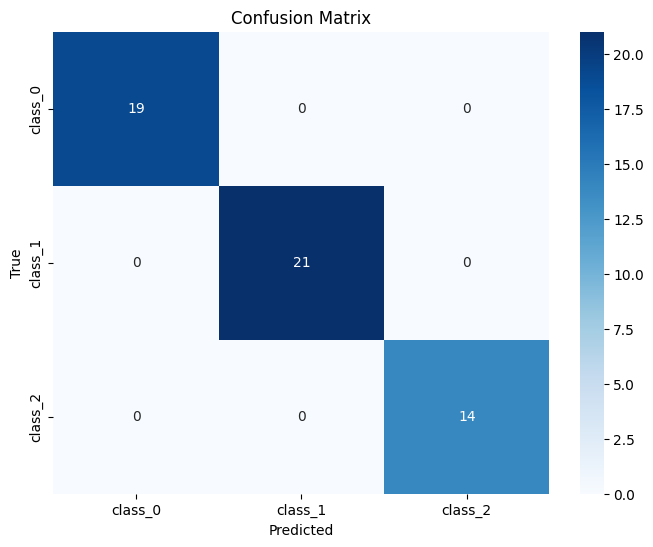

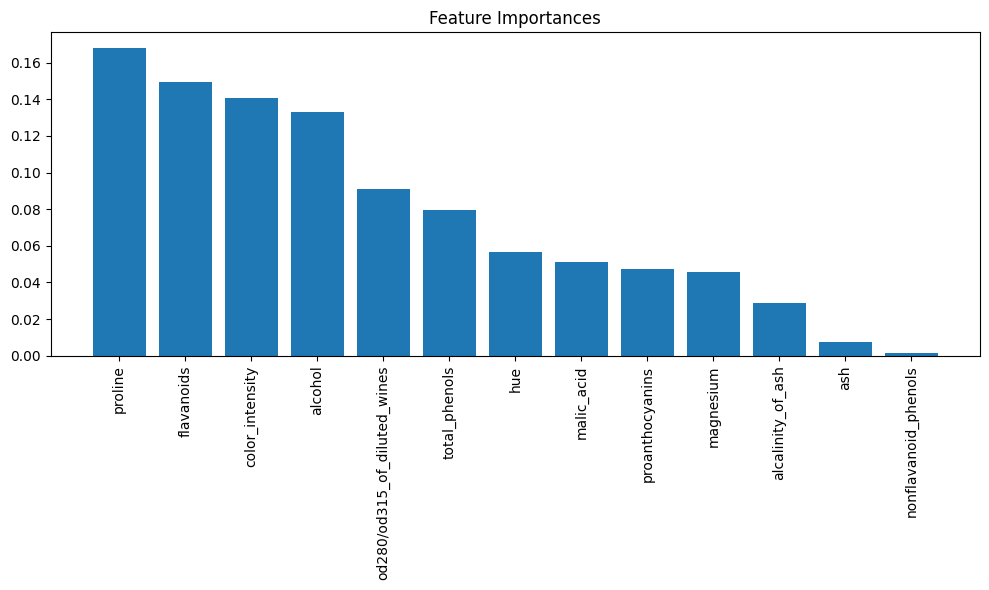

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.exceptions import NotFittedError

def load_data(test_size=0.3, random_state=42):
    data = load_wine()
    X = data.data
    y = data.target
    return train_test_split(X, y, test_size=test_size, random_state=random_state), data.target_names, data.feature_names

def get_hyperparameter_grid():
    return {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'min_samples_split': [2, 5],
        'max_features': ['sqrt', 'log2']
    }

def train_model(X_train, y_train, param_dist, random_state=42):
    gbc = GradientBoostingClassifier(random_state=random_state)
    try:
        random_search = RandomizedSearchCV(
            estimator=gbc,
            param_distributions=param_dist,
            n_iter=10,
            cv=3,
            scoring='accuracy',
            verbose=1,
            n_jobs=-1,
            random_state=random_state
        )
        random_search.fit(X_train, y_train)
        return random_search.best_estimator_, random_search.best_params_
    except Exception as e:
        print("Training failed:", str(e))
        return None, None

def evaluate_model(model, X_test, y_test, target_names):
    try:
        y_pred = model.predict(X_test)
        print("Classification Report on Test Data:")
        print(classification_report(y_test, y_pred, target_names=target_names))
        cm = confusion_matrix(y_test, y_pred)
        print("\nConfusion Matrix:")
        print(cm)

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

    except NotFittedError as e:
        print("Model evaluation failed:", str(e))

def display_feature_importance(model, feature_names):
    try:
        importances = model.feature_importances_
        sorted_idx = np.argsort(importances)[::-1]
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(importances)), importances[sorted_idx], align='center')
        plt.xticks(range(len(importances)), [feature_names[i] for i in sorted_idx], rotation=90)
        plt.title("Feature Importances")
        plt.tight_layout()
        plt.show()
    except AttributeError:
        print("Feature importance not available for this model.")

# Main execution
(X_train, X_test, y_train, y_test), target_names, feature_names = load_data()
param_grid = get_hyperparameter_grid()
model, best_params = train_model(X_train, y_train, param_grid)

if model:
    print("Best Hyperparameters:", best_params)
    evaluate_model(model, X_test, y_test, target_names)
    display_feature_importance(model, feature_names)

